<a href="https://colab.research.google.com/github/taegeonyu/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS-5210 Final Project (Taegeon Yu)
- In my final project, I will go through the intricate relationship between air pollution and lung cancer and explore the inter-relevancy of these two crucial factors in healthcare. The purpose of the project is to analyze and understand the effect of air pollutants on the occurrence of lung cancer in the US. The datasets used in this project include air quality indicators and cancer incidence. The project employs analysis and visualizations to seek patterns, trends of pollution and lung cancer, and my personal thoughts to avoid potential threats. The research will be used as valuable insights to the broader understanding of environmental health risks and enhance the quality of public health.

# The sources:

The link for the datasets used: https://drive.google.com/drive/folders/1I3IyiTTufirY96HVx6k102I5o95CR_by?usp=sharing

The datasets and the sources:
- pollution_2000_2023 2.csv
https://www.kaggle.com/datasets/guslovesmath/us-pollution-data-200-to-2022

- Cancer - new.csv (later transfromed to json file)
- Cancer - death.csv
https://seer.cancer.gov/statfacts/html/lungb.html

- Data_Set_Final_LTD_Slope_Intercept.xlsx
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HMOEJO



# 1. Working with pollution and cancer datasets:
- In this process, I joined three datasets: one pollution data and two cancer data. The purpose of this step was to use pollutant aspects such as O3, CO Mean, SO2, and NO2 to calculate the level of air pollution and link it to somehow irrelevant datasets. I used state and date to bridge the gap among the datasets and eventually came up with a combined dataset of pollution and lung cancer.

In [1]:
# Importing basic python libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the CSV file into a pandas DataFrame pollution.
pollution = '/content/pollution_2000_2023 2.csv'
pollution = pd.read_csv(pollution)

In [3]:
# Checking the general information about the DataFrame pollution.
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         665414 non-null  int64  
 1   Date               665414 non-null  object 
 2   Address            665414 non-null  object 
 3   State              665414 non-null  object 
 4   County             665414 non-null  object 
 5   City               665414 non-null  object 
 6   O3 Mean            665414 non-null  float64
 7   O3 1st Max Value   665414 non-null  float64
 8   O3 1st Max Hour    665414 non-null  int64  
 9   O3 AQI             665414 non-null  int64  
 10  CO Mean            665414 non-null  float64
 11  CO 1st Max Value   665414 non-null  float64
 12  CO 1st Max Hour    665414 non-null  int64  
 13  CO AQI             665414 non-null  float64
 14  SO2 Mean           665414 non-null  float64
 15  SO2 1st Max Value  665414 non-null  float64
 16  SO

In [4]:
# Changing the range of values of Date column from year 2016 to 2020 as it is the time set for the combined cancer data later.
# which will be joining the pollution DataFrame
pollution['Date'] = pd.to_datetime(pollution['Date'])
pollution = pollution[(pollution['Date'].dt.year >= 2016) & (pollution['Date'].dt.year <= 2020)]

In [5]:
# In order to join pollution and cancer_patient_data, I decided to make a new column in pollution DataFrame
# and set the values to the same values with the ones in cancer_patient_data, the selecred columns are chosen to
# get the right value for new Air pollution column in pollution DataFrame. I chosed the mean value as I thought it was better
# than the max value as max value could be outliers.
selected_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']

# This line creates a dictionary named where each key correspond to its respective value.
# These values will be used to calculate the total average pollution level. The values were
# set by myself referring to this website (https://www.epa.gov/criteria-air-pollutants/naaqs-table).
pollution_values = {'O3 Mean': 1, 'CO Mean': 3, 'SO2 Mean': 1, 'NO2 Mean': 2}

# The pollution level is calculated to understand the range of different elements on overall air quality. Not all pollutants
# contribute equally to the air pollution. Therefore, the pollution level allows more accurate assessment of the air quality.
# This code calculates the pollution level by selecting specific columns and multiplying them with corresponding values.
# The sum across columns for each row is divided by the total sum of values and the result represents the pollution level.
pollution['Pollution Level'] = ((pollution[selected_columns] * [pollution_values[key] for key in selected_columns]).sum(axis=1) /
                                sum(pollution_values.values()))

# Accessing the minimum and maximum values of Pollution Level column and setting the value of the new Air pollution column
# between 1 and 8. The formula calculates the normalized values from the range [0, 1] to more expanded range [0, 7]. Finally,
# adding 1 to the calculated values sets the final range of the values is [1, 8]. The range of number was originally meant to
# be used for other DataFrame which has Air Pollution column and value from 1 to 8. Although, I decided not to use that table,
# I still want to use this new Air Pollution column, so I decided to just use it.
pollution['Air Pollution'] = (1 + 7 * (pollution['Pollution Level'] - pollution['Pollution Level'].min()) /
                              (pollution['Pollution Level'].max() - pollution['Pollution Level'].min()))

In [6]:
pollution['Air Pollution'] = round(pollution['Air Pollution']).astype(int)

In [7]:
pollution['Air Pollution'].unique()

array([1, 2, 3, 4, 8])

In [8]:
# Setting the necessary columns for data analysis from pollution DataFrame.
pollution_columns = ['State', 'Air Pollution']

In [9]:
# Changing the pollution DataFrame by only using the columns set above.
pollution = pollution[pollution_columns]
pollution.columns

Index(['State', 'Air Pollution'], dtype='object')

In [10]:
# Read and set the two tables for new cancer and cancer death into variables.
cancer_incidents = '/content/Cancer - new.csv'
cancer_deaths = '/content/Cancer - death.csv'

cancer_incidents = pd.read_csv(cancer_incidents)
cancer_deaths = pd.read_csv(cancer_deaths)

In [11]:
# Converting and reading the csv file into json file to follow the rubric.
convert_to_json = '/content/Cancer - incidents.json'
cancer_incidents.to_json(convert_to_json, orient='records')

In [12]:
# Replacing the new excel file to the cancer incidents DataFrame.
cancer_incidents = '/content/Cancer - incidents.json'
cancer_incidents = pd.read_json(cancer_incidents)

In [13]:
# Checking the general information about the DataFrame cancer_incidents.
cancer_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Area               52 non-null     object
 1   Cancer Type        52 non-null     object
 2   Year               52 non-null     object
 3   Sex                52 non-null     object
 4   Race               52 non-null     object
 5   Type               52 non-null     object
 6   Age-Adjusted Rate  52 non-null     object
 7   Case Count         52 non-null     object
 8   Population         52 non-null     object
dtypes: object(9)
memory usage: 3.8+ KB


In [14]:
# Checking the general information about the DataFrame cancer_deaths.
cancer_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               52 non-null     object 
 1   Cancer Type        52 non-null     object 
 2   Year               52 non-null     object 
 3   Sex                52 non-null     object 
 4   Race               52 non-null     object 
 5   Type               52 non-null     object 
 6   Age-Adjusted Rate  52 non-null     float64
 7   Death Count        52 non-null     int64  
 8   Population         52 non-null     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 3.8+ KB


In [15]:
# Since there are some columns that has the same name and values, I will remove them.
drop_columns_death = ['Cancer Type', 'Year', 'Sex', 'Race', 'Population']
cancer_deaths = cancer_deaths.drop(columns = drop_columns_death, errors='ignore')
cancer_deaths.head()

,Area,Type,Age-Adjusted Rate,Death Count
0,District of Columbia,Mortality,26.9,921
1,Wyoming,Mortality,28.9,1062
2,Alaska,Mortality,32.8,1107
3,North Dakota,Mortality,33.1,1505
4,Vermont,Mortality,36.3,1657


In [16]:
# Checking the values of the column Age-Adjusted Rate from both tables.
print(cancer_incidents['Age-Adjusted Rate'].unique())
print(cancer_deaths['Age-Adjusted Rate'].unique())

['Data not presented' '42.8' '40.4' '52.6' '56.1' '56.3' '55.9' '15.1'
 '24.9' '47.5' '57' '41.7' '63.9' '33.7' '46' '60.8' '52.3' '69.3' '52.5'
 '75.7' '38.3' '60.7' '69.9' '55.2' '49.1' '71.3' '63.2' '61.5' '54.8'
 '51.8' '60.1' '41.6' '58.7' '57.1' '49.4' '84.4' '59' '52.1' '68.1'
 '51.4' '69.7' '57.9' '59.6' '62.8' '59.3' '64.7' '59.5' '46.5' '55.4'
 '37.6' '54.4']
[26.9 28.9 32.8 33.1 36.3 36.2 30.5 16.6 26.6 38.6 10.7 37.5 28.7 23.6
 37.  33.8 43.7 34.9 49.7 38.1 30.3 24.2 37.9 33.2 49.5 48.4 31.9 46.5
 33.5 43.5 27.7 39.3 35.6 31.8 44.6 33.6 54.7 30.2 44.5 35.3 44.9 47.
 37.2 40.  40.6 37.3 42.9 30.1 31.3 25.2 33.9]


In [17]:
# I will get rid of the rows that say Data not presented.
for column in cancer_incidents.columns:
    cancer_incidents = cancer_incidents[cancer_incidents[column] != 'Data not presented']

for column in cancer_deaths.columns:
    cancer_deaths = cancer_deaths[cancer_deaths[column] != 'Data not presented']

In [18]:
# The value Data not presented succesfully dropped.
print(cancer_incidents['Age-Adjusted Rate'].unique())
print(cancer_deaths['Age-Adjusted Rate'].unique())

['42.8' '40.4' '52.6' '56.1' '56.3' '55.9' '15.1' '24.9' '47.5' '57'
 '41.7' '63.9' '33.7' '46' '60.8' '52.3' '69.3' '52.5' '75.7' '38.3'
 '60.7' '69.9' '55.2' '49.1' '71.3' '63.2' '61.5' '54.8' '51.8' '60.1'
 '41.6' '58.7' '57.1' '49.4' '84.4' '59' '52.1' '68.1' '51.4' '69.7'
 '57.9' '59.6' '62.8' '59.3' '64.7' '59.5' '46.5' '55.4' '37.6' '54.4']
[26.9 28.9 32.8 33.1 36.3 36.2 30.5 16.6 26.6 38.6 10.7 37.5 28.7 23.6
 37.  33.8 43.7 34.9 49.7 38.1 30.3 24.2 37.9 33.2 49.5 48.4 31.9 46.5
 33.5 43.5 27.7 39.3 35.6 31.8 44.6 33.6 54.7 30.2 44.5 35.3 44.9 47.
 37.2 40.  40.6 37.3 42.9 30.1 31.3 25.2 33.9]


In [19]:
# As they don't share the same value, I will change the name of the columns to identify them.
cancer_incidents.rename(columns={'Age-Adjusted Rate': 'Age-Adjusted Rate (Incidients)'}, inplace=True)
cancer_deaths.rename(columns={'Age-Adjusted Rate': 'Age-Adjusted Rate (Deaths)'}, inplace=True)

In [20]:
# Setting the columns I will use from both cancer_incidents and cancer_deaths DataFrame.
incident_columns = ['Area', 'Cancer Type', 'Year', 'Sex', 'Race','Age-Adjusted Rate (Incidients)', 'Case Count', 'Population']
death_columns = ['Area', 'Age-Adjusted Rate (Deaths)', 'Death Count']

In [21]:
cancer_incidents = cancer_incidents[incident_columns]
cancer_deaths = cancer_deaths[death_columns]

In [22]:
# Joining the two tables into one DataFrame by using the common denominator (Area).
cancer_incidents_deaths = pd.merge(cancer_incidents, cancer_deaths, on='Area', how='inner')
cancer_incidents_deaths

,Area,Cancer Type,Year,Sex,Race,Age-Adjusted Rate (Incidients),Case Count,Population,Age-Adjusted Rate (Deaths),Death Count
0,District of Columbia,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,42.8,1476,3509871,26.9,921
1,Wyoming,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,40.4,1510,2906735,28.9,1062
2,Alaska,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,52.6,1882,3684943,32.8,1107
3,North Dakota,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,56.1,2516,3801964,33.1,1505
4,Vermont,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,56.3,2586,3121693,36.3,1657
5,South Dakota,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,55.9,3143,4396655,36.2,2039
6,Puerto Rico,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,15.1,3385,14737749,10.7,2678
7,Utah,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,24.9,3466,15756196,16.6,2253
8,Montana,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,47.5,3576,5308517,30.5,2252
9,Delaware,Lung and Bronchus,2016-2020,Male and Female,All Races and Ethnicities,57,3963,4838393,38.6,2646


In [23]:
# Changing the name of column Area into State for joing with the pollution_cancer_data
cancer_incidents_deaths = cancer_incidents.rename(columns={'Area': 'State'})

In [24]:
# Joining the two combined tables into one DataFrame by using the common denominator (State).
pollution_cancer_data = pd.merge(cancer_incidents_deaths, pollution, on='State', how='inner')

In [25]:
pollution_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148766 entries, 0 to 148765
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   State                           148766 non-null  object
 1   Cancer Type                     148766 non-null  object
 2   Year                            148766 non-null  object
 3   Sex                             148766 non-null  object
 4   Race                            148766 non-null  object
 5   Age-Adjusted Rate (Incidients)  148766 non-null  object
 6   Case Count                      148766 non-null  object
 7   Population                      148766 non-null  object
 8   Air Pollution                   148766 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 11.3+ MB


In [26]:
# Renaming the Sex column into Gender.
pollution_cancer_data = pollution_cancer_data.rename(columns={'Sex': 'Gender'})

In [27]:
# The Aggregation is useful to analyze the mean air pollution levels across various columns such as state, cancer type, year,
# and gender in the same dataset.
aggregated_pollution_cancer = pollution_cancer_data.groupby(['State', 'Cancer Type', 'Year', 'Gender']).agg({
    'Air Pollution': 'mean'
}).reset_index()

In [28]:
aggregated_pollution_cancer

,State,Cancer Type,Year,Gender,Air Pollution
0,Alabama,Lung and Bronchus,2016-2020,Male and Female,1.767753
1,Alaska,Lung and Bronchus,2016-2020,Male and Female,1.831055
2,Arizona,Lung and Bronchus,2016-2020,Male and Female,1.869108
3,Arkansas,Lung and Bronchus,2016-2020,Male and Female,1.643131
4,California,Lung and Bronchus,2016-2020,Male and Female,1.660995
5,Colorado,Lung and Bronchus,2016-2020,Male and Female,2.132120
6,Connecticut,Lung and Bronchus,2016-2020,Male and Female,1.838270
7,Delaware,Lung and Bronchus,2016-2020,Male and Female,1.818543
8,Florida,Lung and Bronchus,2016-2020,Male and Female,1.220787
9,Georgia,Lung and Bronchus,2016-2020,Male and Female,1.706416


# 2. Working with air quality and lung cancer data:
- This dataset consisted of both pollution and lung cancer, but I only retrieved the columns that seemed to be useful when joining this dataset with the combined dataset in the first step. I chose the column PM2.5 due to the relevancy of PM2.5 and lung cancer found in this article (https://ehjournal.biomedcentral.com/articles/10.1186/s12940-016-0170-8). I transformed the format and value of the table to be suitable for joining with the combined dataset I worked on.

In [29]:
# Reading the Excel file into a pandas DataFrame air_quality_lung_cancer.
air_quality_lung_cancer = '/content/Data_Set_Final_LTD_Slope_Intercept.xlsx'
air_quality_lung_cancer = pd.read_excel(air_quality_lung_cancer)

In [30]:
# Checking the general information about the DataFrame air_quality_lung_cancer.
air_quality_lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS_code        2602 non-null   int64  
 1   County           2602 non-null   object 
 2   State            2602 non-null   object 
 3   Lung Cancer      2602 non-null   float64
 4   PM2.5            2602 non-null   float64
 5   Status Variable  2602 non-null   int64  
 6   Land_EQI         2602 non-null   float64
 7   Sociod_EQI       2602 non-null   float64
 8   Built_EQI        2602 non-null   float64
 9   LTD              2602 non-null   float64
 10  Intercept        2602 non-null   float64
 11  Slope            2602 non-null   float64
 12  CLU50_1          2602 non-null   int64  
 13  PM10             2602 non-null   float64
 14  SO2              2602 non-null   float64
 15  NO2              2602 non-null   float64
 16  O3               2602 non-null   float64
 17  CO            

In [31]:
# Setting and changing the columns I will use from air_quality_lung_cancer DataFrame.
air_cancer_columns = ['State', 'Lung Cancer', 'PM2.5']
air_quality_lung_cancer = air_quality_lung_cancer[air_cancer_columns]
air_quality_lung_cancer

,State,Lung Cancer,PM2.5
0,AL,73.9,12.06
1,AL,68.4,11.12
2,AL,76.1,12.36
3,AL,86.4,12.24
4,AL,73.1,12.97
...,...,...,...
2597,WY,45.3,6.40
2598,WY,22.6,6.67
2599,WY,37.1,6.57
2600,WY,51.1,6.33


In [32]:
# Checking the NaN values in the DataFrame.
nan_counts = air_quality_lung_cancer.isna().sum()
nan_counts

State          0
Lung Cancer    0
PM2.5          0
dtype: int64

In [33]:
# Checking the table type in case it has been turn to method
type(air_quality_lung_cancer)

pandas.core.frame.DataFrame

In [34]:
# I will use the State column to join this table with merged_data, but this one has abbreviated version.
air_quality_lung_cancer['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS',
       'MO', 'MT', 'NE', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY'], dtype=object)

In [35]:
# Therefore, I replaced every abbreviated states into the original version.
states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

air_quality_lung_cancer['State'] = air_quality_lung_cancer['State'].replace(states)

<ipython-input-35-83d73f6004eb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_lung_cancer['State'] = air_quality_lung_cancer['State'].replace(states)


In [36]:
# Checking if the values have changed.
air_quality_lung_cancer['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [37]:
# The Aggregation is useful to analyze the average Lung Cancer and PM2.5 values across various columns by State column in the same dataset.
aggregated_air_lung_cancer = air_quality_lung_cancer.groupby(['State']).agg({
    'Lung Cancer': 'mean',
    'PM2.5': 'mean',
}).reset_index()

In [38]:
aggregated_air_lung_cancer

,State,Lung Cancer,PM2.5
0,Alabama,71.810448,12.301045
1,Alaska,57.240000,2.844000
2,Arizona,46.100000,6.590667
3,Arkansas,81.465333,11.139067
4,California,49.192857,9.470893
5,Colorado,43.197872,5.952979
6,Connecticut,63.050000,10.123750
7,Delaware,72.966667,11.663333
8,District of Columbia,57.100000,15.000000
9,Florida,70.967692,9.305846


# 3. Final Joining Process:
- The last step of completing the final table for the project.

In [39]:
# Checking the type of the table in case it has turn to method.
type(aggregated_pollution_cancer)

pandas.core.frame.DataFrame

In [40]:
# Confirming the type of air_quality_lung_cancer. Now we can join the two DataFrames and come up with the final version.
type(aggregated_air_lung_cancer)

pandas.core.frame.DataFrame

In [41]:
# Joining the DataFrames for the last time to generate the final version by using State columns.
final_data = aggregated_pollution_cancer.merge(aggregated_air_lung_cancer, on='State', how='inner')

In [42]:
# This code uses the set_index method to reset the index of a final_data DataFrame named.
final_data = final_data.set_index(['Cancer Type', 'Year', 'Gender'], drop=True)

In [43]:
final_data

State  Air Pollution  \
Cancer Type       Year      Gender                                           
Lung and Bronchus 2016-2020 Male and Female         Alabama       1.767753   
                            Male and Female          Alaska       1.831055   
                            Male and Female         Arizona       1.869108   
                            Male and Female        Arkansas       1.643131   
                            Male and Female      California       1.660995   
                            Male and Female        Colorado       2.132120   
                            Male and Female     Connecticut       1.838270   
                            Male and Female        Delaware       1.818543   
                            Male and Female         Florida       1.220787   
                            Male and Female         Georgia       1.706416   
                            Male and Female          Hawaii       1.184940   
                            Male and Female           Idaho       1.713584   
                            Male and Female        Illinois       1.829412   
                            Male and Female            Iowa       1.435232   
                            Male and Female        Kentucky       1.740096   
                            Male and Female       Louisiana       1.833623   
                            Male and Female           Maine       1.292691   
                            Male and Female        Maryland       1.380025   
                            Male and Female   Massachusetts       1.851746   
                            Male and Female     Mississippi       1.468006   
                            Male and Female        Missouri       1.894265   
                            Male and Female   New Hampshire       1.105131   
                            Male and Female      New Jersey       1.931944   
                            Male and Female      New Mexico       1.719424   
                            Male and Female        New York       2.008574   
                            Male and Female  North Carolina       1.382910   
                            Male and Female    North Dakota       1.280445   
                            Male and Female            Ohio       1.806013   
                            Male and Female        Oklahoma       1.485134   
                            Male and Female          Oregon       1.597569   
                            Male and Female    Pennsylvania       1.344241   
                            Male and Female    Rhode Island       1.373789   
                            Male and Female  South Carolina       1.357143   
                            Male and Female    South Dakota       1.236842   
                            Male and Female       Tennessee       1.000000   
                            Male and Female           Texas       1.607589   
                            Male and Female            Utah       1.999411   
                            Male and Female         Vermont       1.395675   
                            Male and Female        Virginia       1.237487   
                            Male and Female      Washington       1.830556   
                            Male and Female         Wyoming       1.147965   

                                             Lung Cancer      PM2.5  
Cancer Type       Year      Gender                                   
Lung and Bronchus 2016-2020 Male and Female    71.810448  12.301045  
                            Male and Female    57.240000   2.844000  
                            Male and Female    46.100000   6.590667  
                            Male and Female    81.465333  11.139067  
                            Male and Female    49.192857   9.470893  
                            Male and Female    43.197872   5.952979  
                            Male and Female    63.050000  10.123750  
                            Male and Female    72.966667  11.663333  

# 4. Data Visualization:
- Since there are not many rows in the final dataset, I did not use boxplot or scatter plot. I used line and bar charts instead.

In [44]:
# Reseting the DataFrame by the states which has top five Lung Cancer incidents.
top_states_lung_cancer = final_data.nlargest(5, 'Lung Cancer')

In [45]:
# Reseting the DataFrame by the states which has the five lowest Lung Cancer incidents.
lowest_states_lung_cancer = final_data.nsmallest(5, 'Lung Cancer')

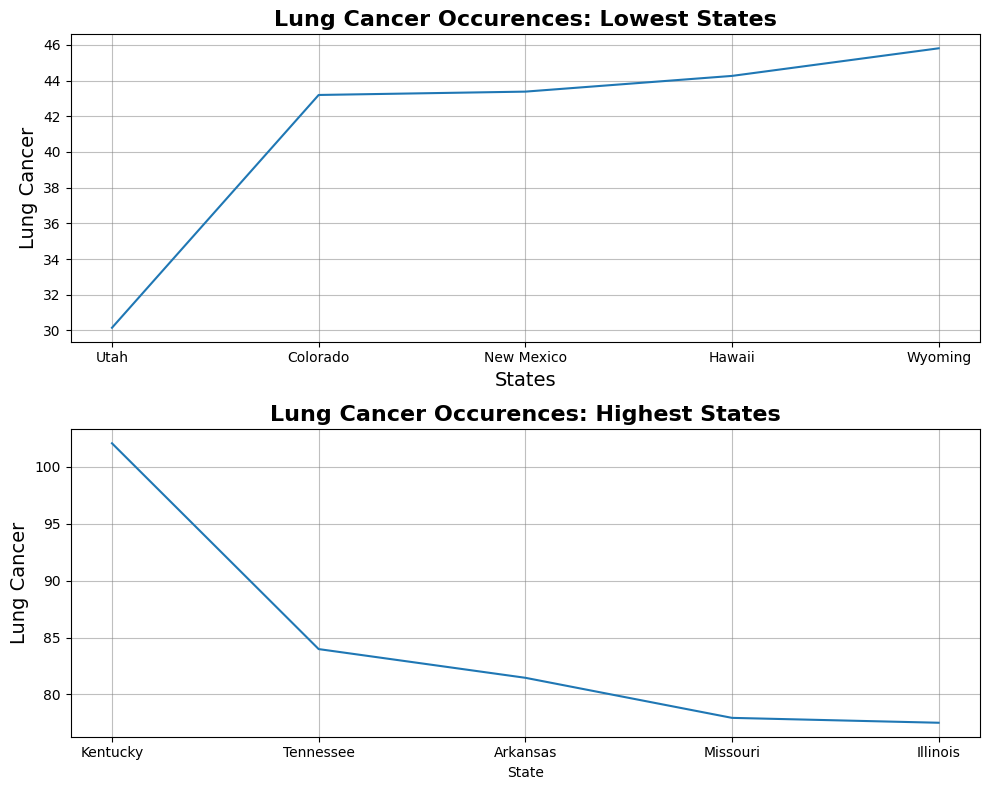

In [46]:
# The fig stands for the entire figure, and the axes variable is an array of the two subplots.
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Generates line plot from lowest_states_lung_cancer DataFrame with State on x-axis and Lung Cancer on the y-axis.
# axes[0] implies the first subplot. Also, i set the title, x label, and y label.
sns.lineplot(data=lowest_states_lung_cancer, x="State", y="Lung Cancer", ax=axes[0])
axes[0].set_title('Lung Cancer Occurences: Lowest States', fontsize=16, fontweight='bold')
axes[0].set_xlabel('States', fontsize=14)
axes[0].set_ylabel('Lung Cancer', fontsize=14)
axes[0].grid(color='gray', alpha=0.5)

# Generates line plot from top_states_lung_cancer DataFrame with State on x-axis and Lung Cancer on the y-axis.
# axes[1] implies the second subplot. Also, i set the title, x label, and y label.
sns.lineplot(data=top_states_lung_cancer, x="State", y="Lung Cancer", ax=axes[1])
axes[1].set_title('Lung Cancer Occurences: Highest States', fontsize=16, fontweight='bold')
axes[0].set_xlabel('States', fontsize=14)
axes[1].set_ylabel('Lung Cancer', fontsize=14)
axes[1].grid(color='gray', alpha=0.5)

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

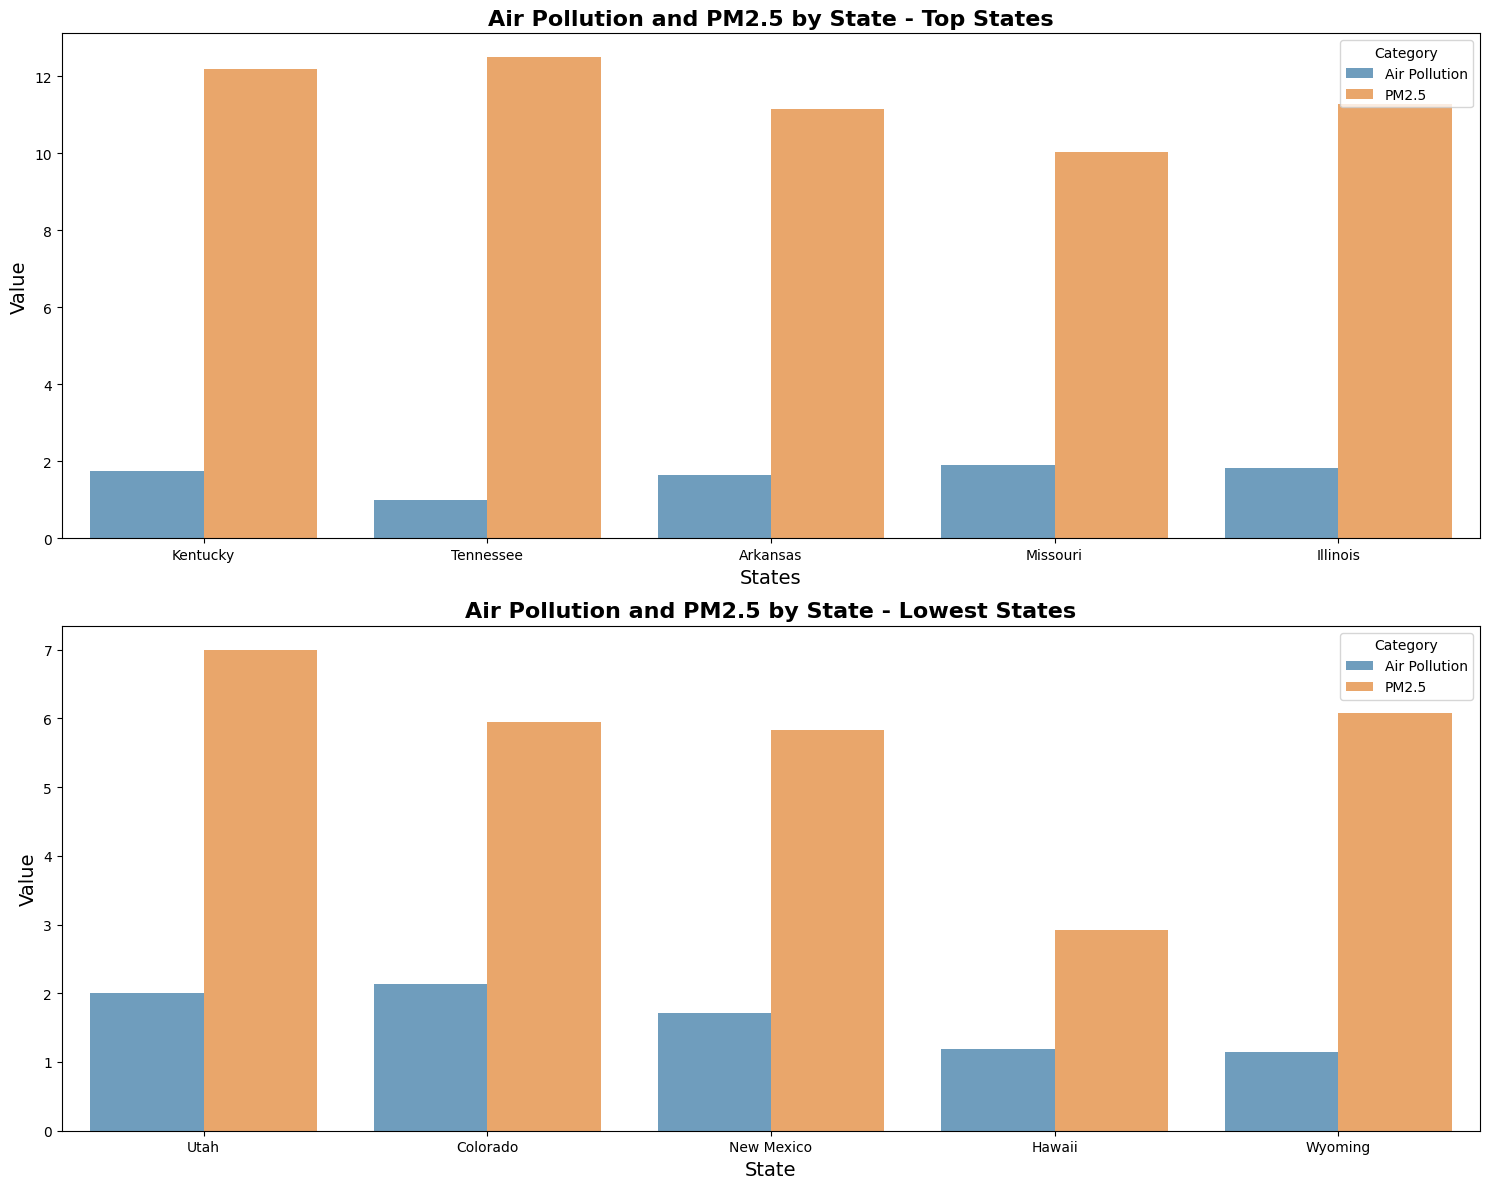

In [47]:
# The fig stands for the entire figure, and the axes variable is an array of the two subplots.
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# This code uses the melt function to reshape the DataFrame from a wide format to a long format,making it more suitable
# format for visualization and showing the bars that represent Air Pollution and PM2.5 value of each top states with Lung Cancer.
melted_top_states = top_states_lung_cancer.melt(id_vars='State', value_vars=['Air Pollution', 'PM2.5'], var_name='Category', value_name='Value')
sns.barplot(x='State', y='Value', hue='Category', data=melted_top_states, alpha=0.7, ax=axes[0])
axes[0].set_xlabel('States', fontsize=14)
axes[0].set_ylabel('Value', fontsize=14)
axes[0].set_title('Air Pollution and PM2.5 by State - Top States', fontsize=16, fontweight='bold')
axes[0].legend(title='Category', loc='upper right')

# This code uses the melt function again to reshape the DataFrame from a wide format to a long format,making it more suitable
# format for visualization and showing the bars that represent Air Pollution and PM2.5 value of each lowest states with Lung Cancer.
melted_lowest_states = lowest_states_lung_cancer.melt(id_vars='State', value_vars=['Air Pollution', 'PM2.5'], var_name='Category', value_name='Value')
sns.barplot(x='State', y='Value', hue='Category', data=melted_lowest_states, alpha=0.7, ax=axes[1])
axes[1].set_xlabel('State', fontsize=14)
axes[1].set_ylabel('Value', fontsize=14)
axes[1].set_title('Air Pollution and PM2.5 by State - Lowest States', fontsize=16, fontweight='bold')
axes[1].legend(title='Category', loc='upper right')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


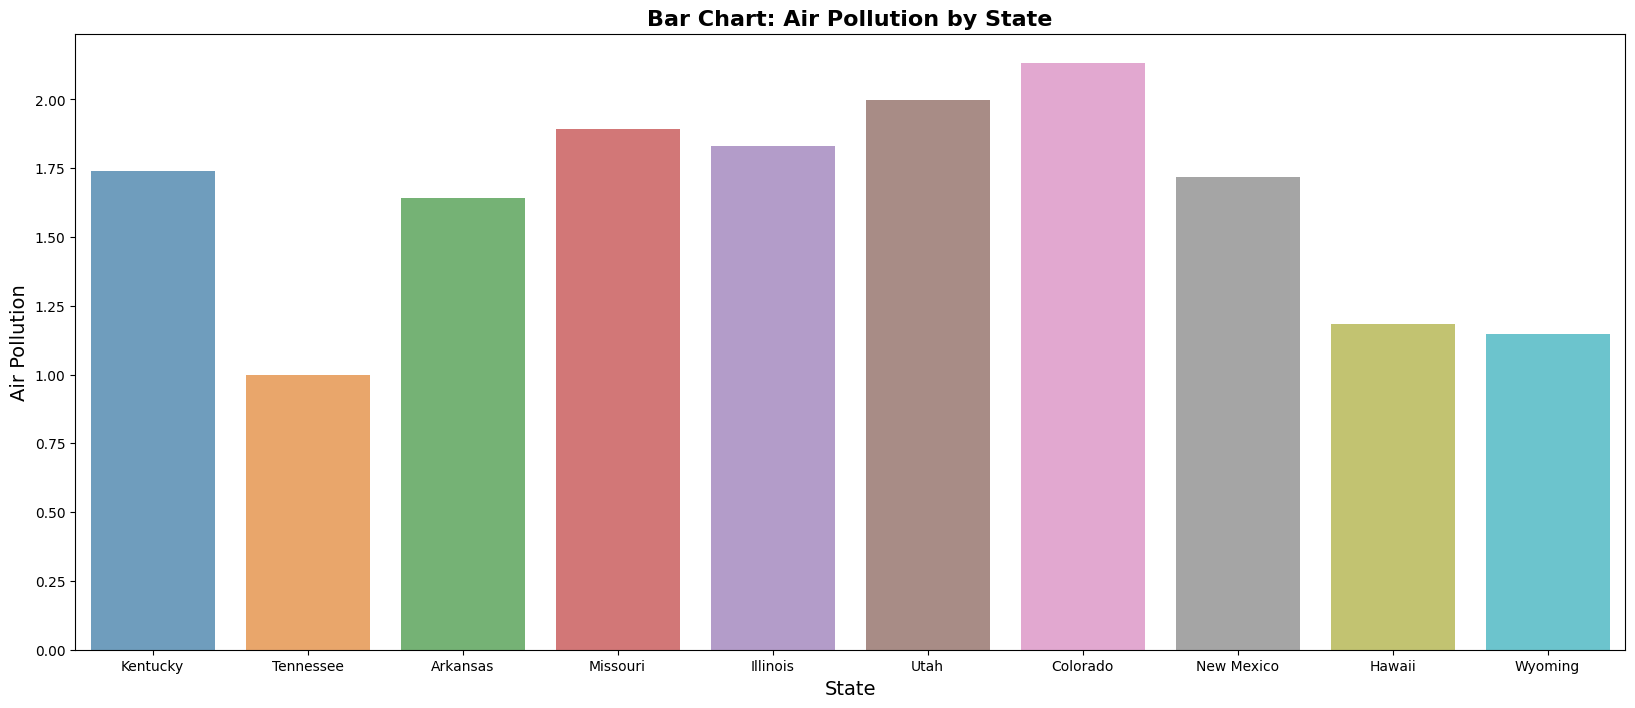

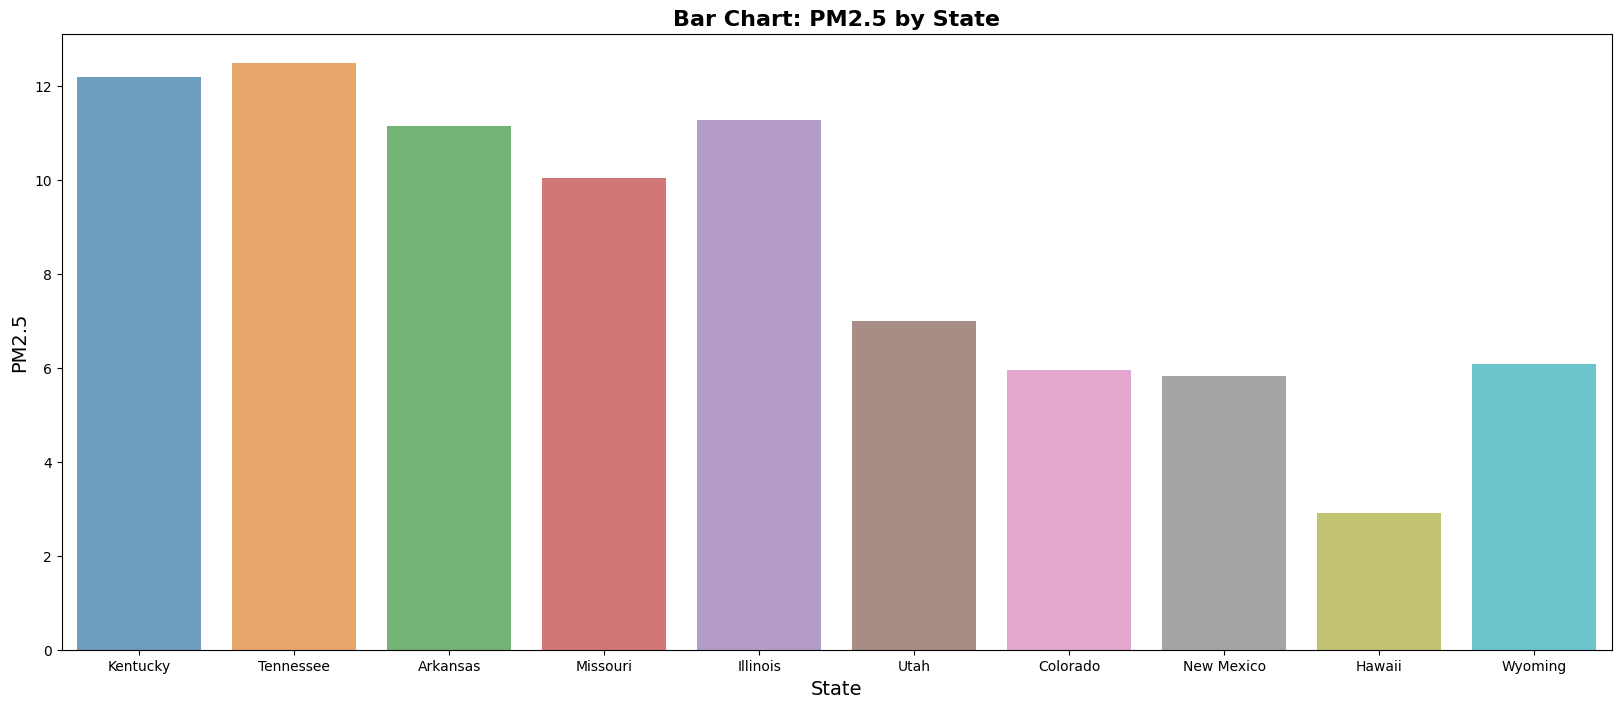

In [48]:
# Concating the top and lowest lung cancer data.
combined_data = pd.concat([top_states_lung_cancer, lowest_states_lung_cancer])

# The melt function is used to transform the DataFrame from a wide format to a long format to make it more suitable
# format for data analysis Also, the codes below generate the bar chart of melted air pollution DataFrame with title and labels.
melted_air_pollution = combined_data.melt(id_vars='State', value_vars=['Air Pollution'], var_name='Category', value_name='Value')
plt.figure(figsize=(20, 8))
sns.barplot(x='State', y='Value', data=melted_air_pollution, alpha=0.7)
plt.xlabel('State', fontsize=14)
plt.ylabel('Air Pollution', fontsize=14)
plt.title('Bar Chart: Air Pollution by State', fontsize=16, fontweight='bold')
plt.show()

# The melt function is utilized when the DataFrame needs to be changed from a wide format to a long format to make it better
# format for data visualization and the codes below creates the bar chart of melted pm25 DataFrame with title and labels.
melted_pm25 = combined_data.melt(id_vars='State', value_vars=['PM2.5'], var_name='Category', value_name='Value')
plt.figure(figsize=(20, 8))
sns.barplot(x='State', y='Value', data=melted_pm25, alpha=0.7)
plt.xlabel('State', fontsize=14)
plt.ylabel('PM2.5', fontsize=14)
plt.title('Bar Chart: PM2.5 by State', fontsize=16, fontweight='bold')
plt.show()

# 5. Observation and Personal thoughts:
- The three visualizations provide insights into the relationship between air pollution, PM2.5, and lung cancer. The line charts each show the five states with the highest and lowest lung cancer occurrences. The bar charts show the average air pollution and PM2.5 levels for the top and lowest states. We can easily notice that the top states have higher levels of air pollution and PM2.5 than the lowest states, which suggests the inter-relevancy of lung cancer, air pollution, and PM2.5.

- Based on these findings, the information can be used to enhance public health improvements, such as reducing air pollution levels to ensure clearer air quality. Moreover, this information can be used to raise public awareness of the potential health risks associated with air pollution. Additionally, it can encourage people to look after themselves from air pollution by wearing masks and avoiding outdoor activities during high air pollution levels.

# 6. Conclusion:
- As it is clear that air pollution and lung cancer have inter-relevancy with each other, it is significant that both government and individuals take this matter seriously and are dedicated to enhancing public well-being.

Government efforts:
- Set stricter air quality standards and pollution emission limits for industrial plants to reduce air pollution.
- Increase monitoring of pollution levels and PM2.5. Issue public health warnings when levels are critically high.
- Work on inventing renewable energy that would reduce the sources of pollution.

Individual efforts:
- Choose to spend time at indoor facilities on high-pollution days.
- Use public transportation and bicycles more often when the personal vehicle is not necessarily needed.
- Avoid smoking and secondhand smoke exposure from other smokers.

These measurements would provide assistance in decreasing the potential danger that may be caused by environmental threats.